In [139]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.models = {
            "Algoritmos Bioinspirados": KNeighborsRegressor(n_neighbors=self.k),
            "Procesamiento de Señales": KNeighborsRegressor(n_neighbors=self.k),
            "Teoría de la Computación": KNeighborsRegressor(n_neighbors=self.k),
            "Tecnologías del Lenguaje Natural": KNeighborsRegressor(n_neighbors=self.k),
            "Aprendizaje de Máquina": KNeighborsRegressor(n_neighbors=self.k),
            "Visión Artificial": KNeighborsRegressor(n_neighbors=self.k),
        }
        self.scaler = StandardScaler()

    def preprocess(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        X_train, X_test = self.scale(X_train, X_test)
        return X_train, X_test, y_train, y_test

    def scale(self, X_train, X_test):
        # Assuming df is a DataFrame with numerical features

        X_train = pd.DataFrame(
            self.scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test = pd.DataFrame(self.scaler.fit_transform(X_test), columns=X_test.columns)
        return X_train, X_test

    def fit(self, model, X, y):

        self.models[model].fit(X, y)

    def predict(self, model, X):
        return self.models[model].predict(X)

In [140]:
df = pd.read_excel("Respuestas.xlsx")
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,...,"¿Consideras que cuentas con una organización de tiempos para el estudio adecuada? (Por ejemplo, dividir tus temas por asignatura y dificultad de acuerdo al tiempo con el que cuentas).",¿Cómo calificarías tu nivel de organización académica?,¿Consideras que gestionas bien tu tiempo de estudio?,¿Qué tan frecuentemente postergas actividades académicas?,¿Sueles cumplir con los tiempos de entrega de tus tareas?,Ordena las materias de 5to Semestre por dificultad y dedicación que necesites,¿Qué problema principalmente enfrentas al momento de planificar tus tiempos de estudio?,¿Qué herramientas usas para organizarte?,¿Qué funcionalidades consideras más útiles para una agenda de estudio con IA?\n,¿Qué esperas al utilizar una aplicación para brindarte apoyo en tu organización académica?
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Medio,A veces,Ocasionalmente,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;",Seguimiento de tareas y entregas;,Aprovechar mi tiempo de buena manera
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Si :),Medio,Si,Ocasionalmente,A veces,Teoría de la Computación;Procesamiento de Seña...,Me cuesta priorizar las actividades y tareas,Notion / Trello;,Seguimiento de tareas y entregas;Ajustes dinám...,Aprovechar mi tiempo de buena manera
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",...,No :(,Medio,No,Frecuentemente,Siempre,Procesamiento de Señales;Algoritmos Bioinspira...,Me distraigo fácilmente,Microsoft To Do;,Seguimiento de tareas y entregas;Recordatorios...,Aprovechar mi tiempo de buena manera
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",...,No :(,Medio,A veces,Frecuentemente,A veces,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"Notion / Trello;No uso ninguna, con mi memoria...",Recomendaciones automáticas de estudio según d...,Tener mis tareas mejor ordenadas
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Alto,Si,Siempre,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;Agen...",Recomendaciones automáticas de estudio según d...,Aprovechar mi tiempo de buena manera
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Si :),Medio,A veces,Frecuentemente,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;",Seguimiento de tareas y entregas;Sugerencias s...,No olvidarme de mis pendientes
6,7,2025-05-14 10:06:39,2025-05-14 10:10:00,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Bajo,No,Siempre,Siempre,Teoría de la Computación;Tecnologías del Lengu...,Me cuesta priorizar las actividades y tareas,"No uso ninguna, con mi memoria me basta 🥱;",Recomendaciones automáticas de estudio según d...,Tener mis tareas mejor ordenadas
7,8,2025-05-14 11:34:58,2025-05-14 11:40:54,anonymous,NaN,NaN,Masculino,21-23,Menos de 30 min,"Sí, tengo otras actividades (deporte, voluntar...",...,No :(,Medio,No,Frecuentemente,A veces,Procesamiento de Señales;Aprendizaje de Máquin...,Me cuesta prio

In [141]:
def materias_frecuencias(x):
    l = {
        "Algoritmos Bioinspirados": 0,
        "Procesamiento de Señales": 0,
        "Teoría de la Computación": 0,
        "Tecnologías del Lenguaje Natural": 0,
        "Aprendizaje de Máquina": 0,
        "Visión Artificial": 0,
    }
    for i in range(len(x)):
        lst = x[i].split(";")
        for key in l.keys():
            for j in range(len(lst)):
                if key == lst[j]:
                    l[key] += (6 - j) ** 0.8
    return l

In [142]:
def frecuencia_individual(x, i, frecuencias, l):
    lst = x[i].split(";")
    for key in frecuencias.keys():
        for j in range(len(lst)):
            if key == lst[j]:
                l[key] = (6 - j) ** 0.8 * frecuencias[key]
    suma = sum(list(l.values()))
    for key in frecuencias.keys():
        l[key] = l[key] / suma
    return l

In [143]:
def calc_horas(hora):
    horas = hora.split("–")
    if len(horas) != 2:
        horas = hora.split("-")
    hora1 = horas[0].split(":")
    hora2 = horas[1].split(":")
    return (int(hora1[0]) + int(hora2[0])) / 2

In [144]:
def tiempo_al_dia(hora):
    if hora == "Menos de 30 min o simplemente no estudio":
        return 0.25
    elif hora == "30 min - 1 hora":
        return 0.75
    elif hora == "1hr - 2hrs":
        return 1.5
    else:
        return 2.5

In [145]:
def nuevo_df(df, frecuencias):
    n_df = pd.DataFrame(
        {
            "Algoritmos Bioinspirados": [],
            "Procesamiento de Señales": [],
            "Teoría de la Computación": [],
            "Tecnologías del Lenguaje Natural": [],
            "Aprendizaje de Máquina": [],
            "Visión Artificial": [],
            "Lunes": [],
            "Martes": [],
            "Miércoles": [],
            "Jueves": [],
            "Viernes": [],
            "Tiempo al día": [],
        }
    )
    for i in range(len(df)):
        l = {
            "Algoritmos Bioinspirados": 0,
            "Procesamiento de Señales": 0,
            "Teoría de la Computación": 0,
            "Tecnologías del Lenguaje Natural": 0,
            "Aprendizaje de Máquina": 0,
            "Visión Artificial": 0,
        }
        l = frecuencia_individual(
            df[
                "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
            ].values,
            i,
            frecuencias,
            l,
        )
        registro = list(l.values())
        registro = registro + [
            calc_horas(df["Lunes"].values[i]),
            calc_horas(df["Martes"].values[i]),
            calc_horas(df["Miércoles"].values[i]),
            calc_horas(df["Jueves"].values[i]),
            calc_horas(df["Viernes"].values[i]),
            tiempo_al_dia(
                df[
                    "¿Cuánto tiempo al día dedicas a estudiar fuera del horario escolar?"
                ].values[i]
            ),
        ]

        n_df.loc[i] = registro

    return n_df

In [146]:
frecuencias = materias_frecuencias(
    df[
        "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
    ].values
)
frecuencias

{'Algoritmos Bioinspirados': 158.30509038677886,
 'Procesamiento de Señales': 181.63542828405102,
 'Teoría de la Computación': 187.44200393779812,
 'Tecnologías del Lenguaje Natural': 120.82861667752901,
 'Aprendizaje de Máquina': 139.0160528150361,
 'Visión Artificial': 124.63714652577322}

In [147]:
suma = sum(list(frecuencias.values()))
suma

911.8643386269663

In [148]:
for key in frecuencias.keys():
    frecuencias[key] = frecuencias[key] / suma
frecuencias

{'Algoritmos Bioinspirados': 0.17360596711693507,
 'Procesamiento de Señales': 0.19919128382358647,
 'Teoría de la Computación': 0.2055590903138483,
 'Tecnologías del Lenguaje Natural': 0.13250722893656078,
 'Aprendizaje de Máquina': 0.15245256002045063,
 'Visión Artificial': 0.13668386978861877}

In [149]:
n_df = nuevo_df(df, frecuencias)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75


In [150]:
from statistics import mode

In [151]:
n_df["Semana"] = n_df.apply(
    lambda x: mode(
        [
            x["Lunes"],
            x["Martes"],
            x["Miércoles"],
            x["Jueves"],
            x["Viernes"],
        ]
    ),
    axis=1,
)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día,Semana
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50,17.5
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50,8.5
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75,14.5
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50,17.5
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50,20.5
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25,20.5
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75,8.5
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75,8.5
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50,8.5
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75,20.5


In [152]:
tiempo_efectivo = {
    "8.5": n_df[n_df["Semana"] == 8.5]["Tiempo al día"].mean(),
    "11.5": n_df[n_df["Semana"] == 11.5]["Tiempo al día"].mean(),
    "14.5": n_df[n_df["Semana"] == 14.5]["Tiempo al día"].mean(),
    "17.5": n_df[n_df["Semana"] == 17.5]["Tiempo al día"].mean(),
    "20.5": n_df[n_df["Semana"] == 20.5]["Tiempo al día"].mean(),
}

tiempo_efectivo

{'8.5': np.float64(1.1875),
 '11.5': np.float64(0.95),
 '14.5': np.float64(1.3333333333333333),
 '17.5': np.float64(1.2916666666666667),
 '20.5': np.float64(1.1160714285714286)}

In [153]:
for key in tiempo_efectivo.keys():
    tiempo_efectivo[key] = (tiempo_efectivo[key] / max(tiempo_efectivo.values())) * 0.9
tiempo_efectivo

{'8.5': np.float64(0.8015625000000001),
 '11.5': np.float64(0.64125),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [154]:
tiempo_efectivo

{'8.5': np.float64(0.8015625000000001),
 '11.5': np.float64(0.64125),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [155]:
def etiquetar(df, tiempo_efectivo):
    df["Et_Algoritmos Bioinspirados"] = df.apply(
        lambda row: tiempo_efectivo[str(row["Viernes"])]
        * row["Algoritmos Bioinspirados"],
        axis=1,
    )
    df["Et_Procesamiento de Señales"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Viernes"]), 0)
        * row["Procesamiento de Señales"],
        axis=1,
    )
    df["Et_Teoría de la Computación"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Viernes"]), 0)
        * row["Teoría de la Computación"],
        axis=1,
    )
    df["Et_Tecnologías del Lenguaje Natural"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Viernes"]), 0)
        * row["Tecnologías del Lenguaje Natural"],
        axis=1,
    )
    df["Et_Aprendizaje de Máquina"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Viernes"]), 0)
        * row["Aprendizaje de Máquina"],
        axis=1,
    )
    df["Et_Visión Artificial"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Viernes"]), 0)
        * row["Visión Artificial"],
        axis=1,
    )
    return df

In [156]:
df_et = etiquetar(n_df, tiempo_efectivo)
df_et

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día,Semana,Et_Algoritmos Bioinspirados,Et_Procesamiento de Señales,Et_Teoría de la Computación,Et_Tecnologías del Lenguaje Natural,Et_Aprendizaje de Máquina,Et_Visión Artificial
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50,17.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50,8.5,0.050488,0.209926,0.250655,0.092802,0.077193,0.120499
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75,14.5,0.150023,0.199162,0.049018,0.076094,0.110204,0.056749
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50,17.5,0.056346,0.271074,0.241774,0.103570,0.149996,0.077239
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50,20.5,0.166722,0.264590,0.235990,0.073088,0.116309,0.043301
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25,20.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75,8.5,0.153387,0.139811,0.251208,0.139956,0.077363,0.039838
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75,8.5,0.052460,0.252378,0.108149,0.096427,0.166944,0.125206
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50,8.5,0.119238,0.238202,0.212455,0.037791,0.075703,0.118173
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75,20.5,0.134589,0.268869,0.239807,0.074270,0.049078,0.133387


In [157]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt

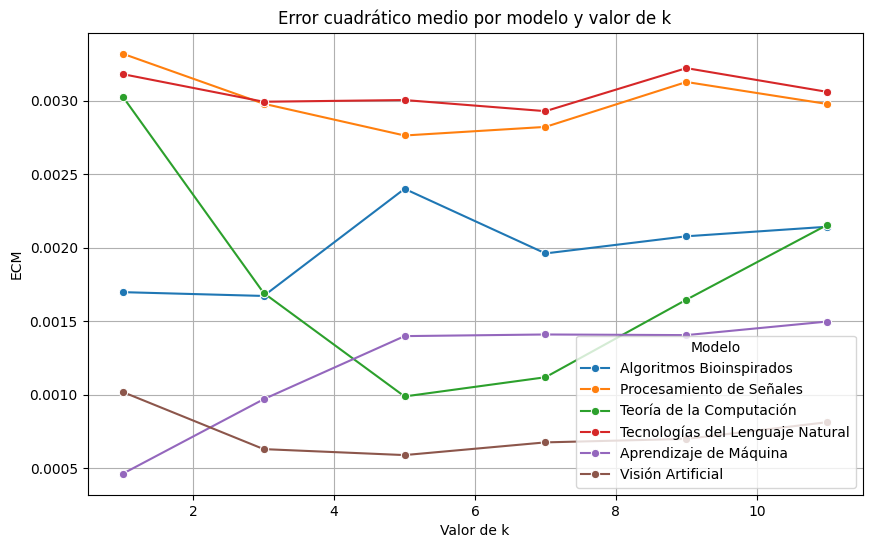

In [158]:
valores_k = [1, 3, 5, 7, 9, 11]
resultados = []
for k in valores_k:
    modelosKnn = KNNClassifier(k=k)
    X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
    for model in modelosKnn.models.keys():
        modelosKnn.fit(model, X_train, y_train["Et_" + model])
        pred = modelosKnn.predict(model, X_test)
        mse = mean_squared_error(y_test["Et_" + model], pred)
        resultados.append({"Modelo": model, "k": k, "ECM": mse})

df_resultados = pd.DataFrame(resultados)

# Mostramos la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados, x="k", y="ECM", hue="Modelo", marker="o")
plt.title("Error cuadrático medio por modelo y valor de k")
plt.xlabel("Valor de k")
plt.ylabel("ECM")
plt.grid(True)

In [163]:
modelosKnn = KNNClassifier(k=5)

X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
predicciones = {}
for model in modelosKnn.models.keys():
    modelosKnn.fit(model, X_train, y_train["Et_" + model])
    predicciones[model] = modelosKnn.predict(model, X_test)
    print(
        f"Error cuadrático medio para {model}:",
        mean_squared_error(y_test["Et_" + model], predicciones[model]),
    )

Error cuadrático medio para Algoritmos Bioinspirados: 0.002400436832979583
Error cuadrático medio para Procesamiento de Señales: 0.002762931030844873
Error cuadrático medio para Teoría de la Computación: 0.0009882473843748046
Error cuadrático medio para Tecnologías del Lenguaje Natural: 0.0030040891808389724
Error cuadrático medio para Aprendizaje de Máquina: 0.0013985762582522905
Error cuadrático medio para Visión Artificial: 0.0005894441956712625


In [164]:
pd.DataFrame(predicciones), y_test[
    [
        "Et_Algoritmos Bioinspirados",
        "Et_Procesamiento de Señales",
        "Et_Teoría de la Computación",
        "Et_Tecnologías del Lenguaje Natural",
        "Et_Aprendizaje de Máquina",
        "Et_Visión Artificial",
    ]
]

(    Algoritmos Bioinspirados  Procesamiento de Señales  \
 0                   0.161127                  0.253102   
 1                   0.174106                  0.237880   
 2                   0.197790                  0.235429   
 3                   0.121160                  0.196956   
 4                   0.117410                  0.219190   
 5                   0.198117                  0.192929   
 6                   0.108699                  0.223961   
 7                   0.200957                  0.158909   
 8                   0.165083                  0.140039   
 9                   0.190994                  0.225303   
 10                  0.169876                  0.137053   
 11                  0.144854                  0.244586   
 
     Teoría de la Computación  Tecnologías del Lenguaje Natural  \
 0                   0.237814                          0.055029   
 1                   0.252439                          0.061176   
 2                   0.159959 

In [161]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
import pickle

app = Flask(__name__)
CORS(app)

In [162]:
@app.route("/predecir", methods=["POST"])
def predecir():
    data = request.get_json()
    modelo = data.get("modelo")
    features = data.get("features")

    if modelo not in modelosKnn.models:
        return jsonify({"error": "Modelo no válido"}), 400

    X = pd.DataFrame([features])
    X_scaled = pd.DataFrame(modelosKnn.scaler.transform(X), columns=X.columns)

    try:
        pred = modelosKnn.predict(modelo, X_scaled)
        return jsonify({"prediccion": pred.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)}), 500


if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
def materias(x, i):
    return x.split(";")[i]

In [ ]:
df["Materia1"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 0))
df["Materia2"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 1))
df["Materia3"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 2))
df["Materia4"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 3))
df["Materia5"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 4))
df["Materia6"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 5))

In [ ]:
df["Algoritmos Bioinspirados"] = df["Materia1"].apply(
    lambda x: frecuencias["Algoritmos Bioinspirados"]
)
df["Procesamiento de Señales"] = df["Materia1"].apply(
    lambda x: frecuencias["Procesamiento de Señales"]
)
df["Teoría de la Computación"] = df["Materia1"].apply(
    lambda x: frecuencias["Teoría de la Computación"]
)
df["Tecnologías del Lenguaje Natural"] = df["Materia1"].apply(
    lambda x: frecuencias["Tecnologías del Lenguaje Natural"]
)
df["Aprendizaje de Máquina"] = df["Materia1"].apply(
    lambda x: frecuencias["Aprendizaje de Máquina"]
)
df["Visión Artificial"] = df["Materia1"].apply(
    lambda x: frecuencias["Visión Artificial"]
)

In [ ]:
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,...,Materia3,Materia4,Materia5,Materia6,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Teoría de la Computación,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
6,7,2025-05-14 10:06:39,2025-05-14 10:10:00,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Procesamiento de Señales,Aprendizaje de Máquina,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
7,8,2025-05-14 11:34:58,2025-05-14 11:40:54,anonymous,NaN,NaN,Masculino,21-23,Menos de 30 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Teoría de la Computación,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
8,9,2025-05-14 11:55:41,2025-05-14 11:57:43,anonymous,NaN,NaN,Femenino,18-20,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
9,10,2025-05-14 15:49:32,2025-05-14 15:52:34,anonymous,NaN,NaN,Femenino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041


In [ ]:
def crear_nuevo_registro(df: pd.DataFrame, frecuencias: dict, valores: list):
    nuevo_registro = []
    for key in frecuencias.keys():
        nuevo_registro.append(frecuencias[key])
    nuevo_registro.extend(valores)
    df.loc[len(df)] = nuevo_registro
    return df